# **Preparación de los datos**


In [1]:
#Librerias que vamos a usar a lo largo del EDA
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, f_oneway
import sys
sys.path.insert(0,"../utils")
import utils as funciones
import variables as vari

# **Carga de la base de datos y limpieza**

In [2]:
#Llamamos al csv y creamos el df de perfil turistico
df_perfil_turistico = pd.read_csv("./data/Perfil_turístico.csv", sep=";", encoding="latin1")
#LIMPIEZA DE LOS DATOS
# Sexo
df_perfil_turistico["Sexo"] = df_perfil_turistico["Sexo"].replace({1: "Hombre", 6: "Mujer"})
#Nivel educativo
df_perfil_turistico["Nivel_educativo"] = df_perfil_turistico["Nivel_educativo"].replace({1:"Sin estudios", 2:"Estudios primarios", 3:"Estudios secundarios", 4:"Estudios superiores"})
#Situacion laboral
df_perfil_turistico["Situacion_laboral"] = df_perfil_turistico["Situacion_laboral"].replace({ 1:"Asalariado", 2:"Autonomo", 3:"Empresario_peque", 4:"Empresario_grande",
5:"Desempleado", 6:"Estudiante", 7:"Jubilado", 8:"Incapacitado", 9:"Militar", 10:"Dependients", 11:"Otros"})
#Ingresos
df_perfil_turistico["Ingresos"] = df_perfil_turistico["Ingresos"].replace({1:"Menos 25.000", 2:"25.000-49.999",3:"50.000-74.999", 4:"+75.000"})
#Tipo de alojamiento
df_perfil_turistico["Tipo_alojamiento"] = df_perfil_turistico["Tipo_alojamiento"].replace({1:"Hotel 1-2-3*", 2:"Hotel 4*",3:"Hotel 5*", 4:"Apartamento/Villa", 5:"Vivienda/airbnb", 6:"Alojamiento privado", 7:"Alojamiento rural"})
#Repetiría
df_perfil_turistico["Repetiria"] = df_perfil_turistico["Repetiria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})
#Calificacion
df_perfil_turistico["Calificacion"] = df_perfil_turistico["Calificacion"].replace({1:"Mucho peor de lo esperado", 2:"Peor de lo esperado",3:"A la altura de las expectativas", 4:"Mejor de lo esperado", 5:"Mucho mejor de lo esperado"})
#Creamos una columna con el tipo de acompañante para tener en la misma columna el "modo_viaje" y asi estudiarla mejor
columnas_tipo_acompañante = ["Viaja_solo", "Viaja_pareja", "Viaja_hijo", "Viaja_amigos", "Viaja_otros"]
df_perfil_turistico["Modo_viaje"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_acompañante if row[col] == "Si"), axis=1)
df_perfil_turistico = df_perfil_turistico.drop(columns=["Viaja_pareja","Viaja_hijo","Viaja_otros","Viaja_solo","Viaja_amigos"])
#Unificación columna de gastos
df_perfil_turistico["Gastos_totales"] = (df_perfil_turistico["Coste_vuelos"] +df_perfil_turistico["Coste_alojamiento"] +df_perfil_turistico["Gastos"])
# Convertir algunas columnas a float
df_perfil_turistico["Edad"] = df_perfil_turistico["Edad"].astype(float)
#ESTUDIO DE LOS DATOS
variables_categoricas=["Sexo","Nacionalidad","Tipo_alojamiento","Calificacion","Repetiria","Nivel_educativo","Situacion_laboral","Ingresos", "Modo_viaje"]
#Datos prepandemia
df_2019 = df_perfil_turistico[df_perfil_turistico['Año'] == 2019]
#Datos postpandemia
df_2022 = df_perfil_turistico[df_perfil_turistico['Año'] == 2022]

# **Análisis Multivariante**

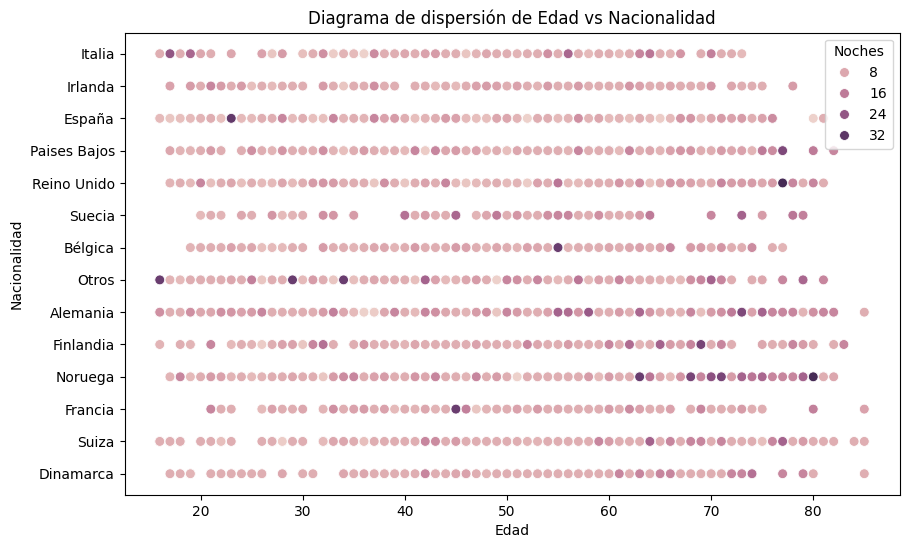

In [3]:
funciones.plot_scatter(df_2022, vari.Edad, vari.Nacionalidad, vari.Noches)

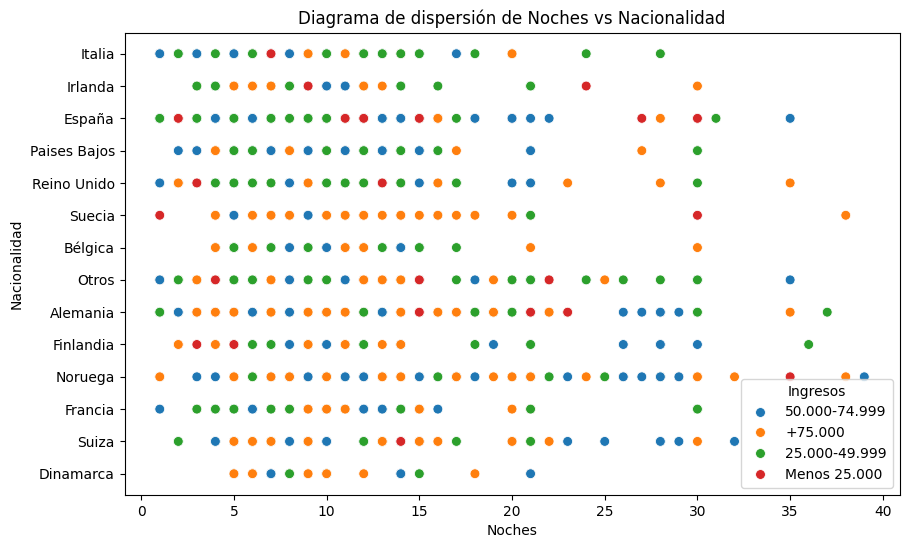

In [4]:
funciones.plot_scatter(df_2022, vari.Noches, vari.Nacionalidad, vari.Ingresos)